# Импортируем библиотеки и данные

In [100]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score
%matplotlib inline
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [101]:
TRAIN = "C:/users/kgera/1.Lessons/kypcobou/train.csv" 
TEST = "C:/users/kgera/1.Lessons/kypcobou/test.csv"
PREPARED_DATASET_PATH = "C:/users/kgera/1.Lessons/kypcobou/testPrepared.csv"

In [102]:
df = pd.read_csv(TRAIN)

In [103]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

# Анализируем данные, смотрим на выбросы

## Было:

In [104]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [105]:
df[:5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [106]:
np.set_printoptions(suppress=True)

In [107]:
df[df['KitchenSquare'] > 400].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


In [108]:
df[df['Square'] > 400].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562


In [109]:
df[df['LifeSquare'] > 400].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978


In [110]:
mediansSquare = df[['LifeSquare', 'Square', 'KitchenSquare']].median()

In [111]:
mediansSquare

LifeSquare       32.78126
Square           52.51331
KitchenSquare     6.00000
dtype: float64

In [112]:
df.loc[df['LifeSquare'] > 400, 'LifeSquare'] = mediansSquare
df.loc[df['Square'] > 400, 'Square'] = mediansSquare
df.loc[df['KitchenSquare'] > 400, 'KitchenSquare'] = mediansSquare

In [113]:
df[['Square', 'KitchenSquare']] = df[['Square', 'KitchenSquare']].fillna(mediansSquare)

## Стало: 
Убрали конкретные выбросы по значениям

In [114]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7883.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.166010,36.077983,5.876100,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,19.149659,18.014430,5.174014,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.767925,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513040,32.767366,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.889736,45.107755,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,275.645284,263.542020,123.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [115]:
df[:5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


# Проводим работу с данными
Меняем 0 на A, B на 1, в данных имеющих характеристику A/B, а также заполняем пропуски и исправляем ошибку с годом дома

In [116]:
df['Ecology_2'] = df["Ecology_2"].replace("A", 0)
df['Ecology_2'] = df["Ecology_2"].replace("B", 1)
df['Ecology_3'] = df["Ecology_3"].replace("A", 0)
df['Ecology_3'] = df["Ecology_3"].replace("B", 1)
df['Shops_2'] = df["Shops_2"].replace("A", 0)
df['Shops_2'] = df["Shops_2"].replace("B", 1)
df.loc[df['HouseYear'] == 20052011, 'HouseYear'] = int((2005+2011)/2)
df.loc[df['HouseYear'] == 4968, 'HouseYear'] = 1968

In [117]:
medians = df[['LifeSquare', 'Healthcare_1']].mean()
df[['LifeSquare', 'Healthcare_1']] = df[['LifeSquare', 'Healthcare_1']].fillna(medians)
df.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [118]:
df[:5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,1142.90446,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.00000,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.00000,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.00000,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.00000,2,4,1,150226.531644


# Визуализируем данные

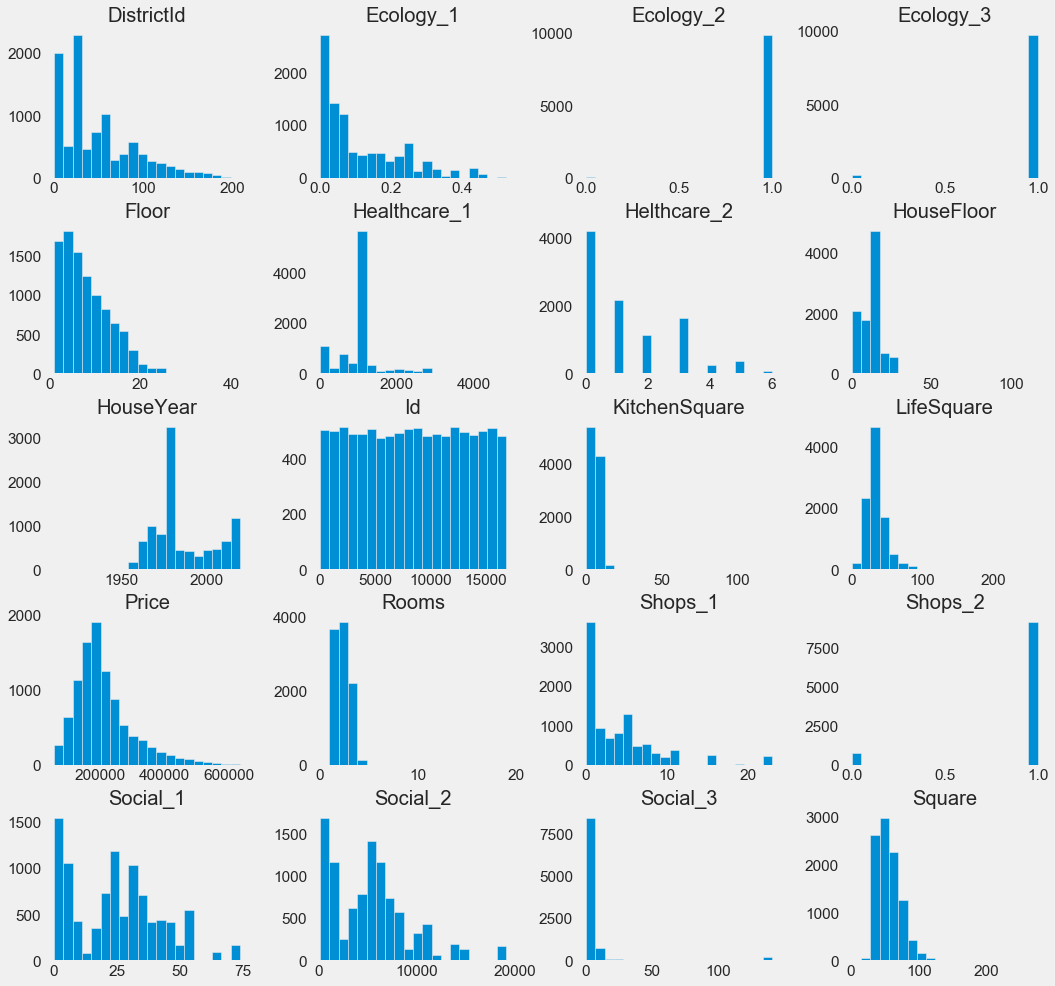

In [119]:
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'png'
df_num_features = df.select_dtypes(include=['float64', 'float32','float32', 'float16','int8','int16','int64','int32'])
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

Text(0.5,1,'Distribution of variable House Year')

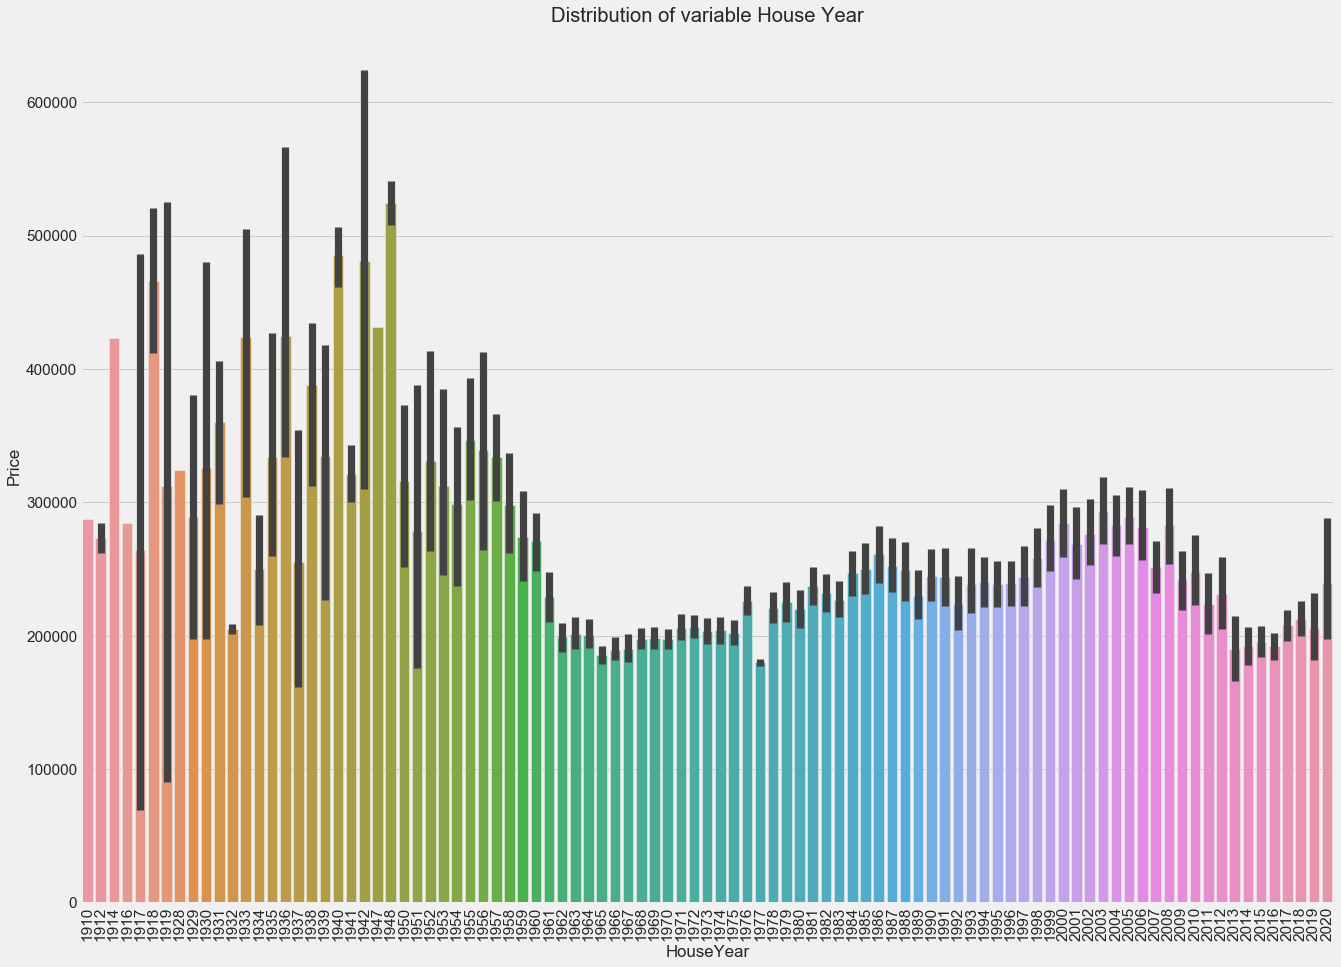

In [120]:
plt.figure(figsize=(20, 15))
sns.barplot(df['HouseYear'], df['Price'])
plt.xticks(rotation=90)
plt.title('Distribution of variable House Year')

Text(0.5,1,'Distribution of variable Rooms')

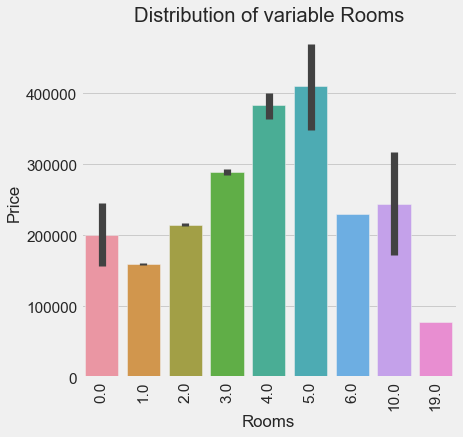

In [121]:
plt.figure(figsize=(6, 6))
sns.barplot(df['Rooms'], df['Price'])
plt.xticks(rotation=90)
plt.title('Distribution of variable Rooms')

# Смотрим корреляцию признаков

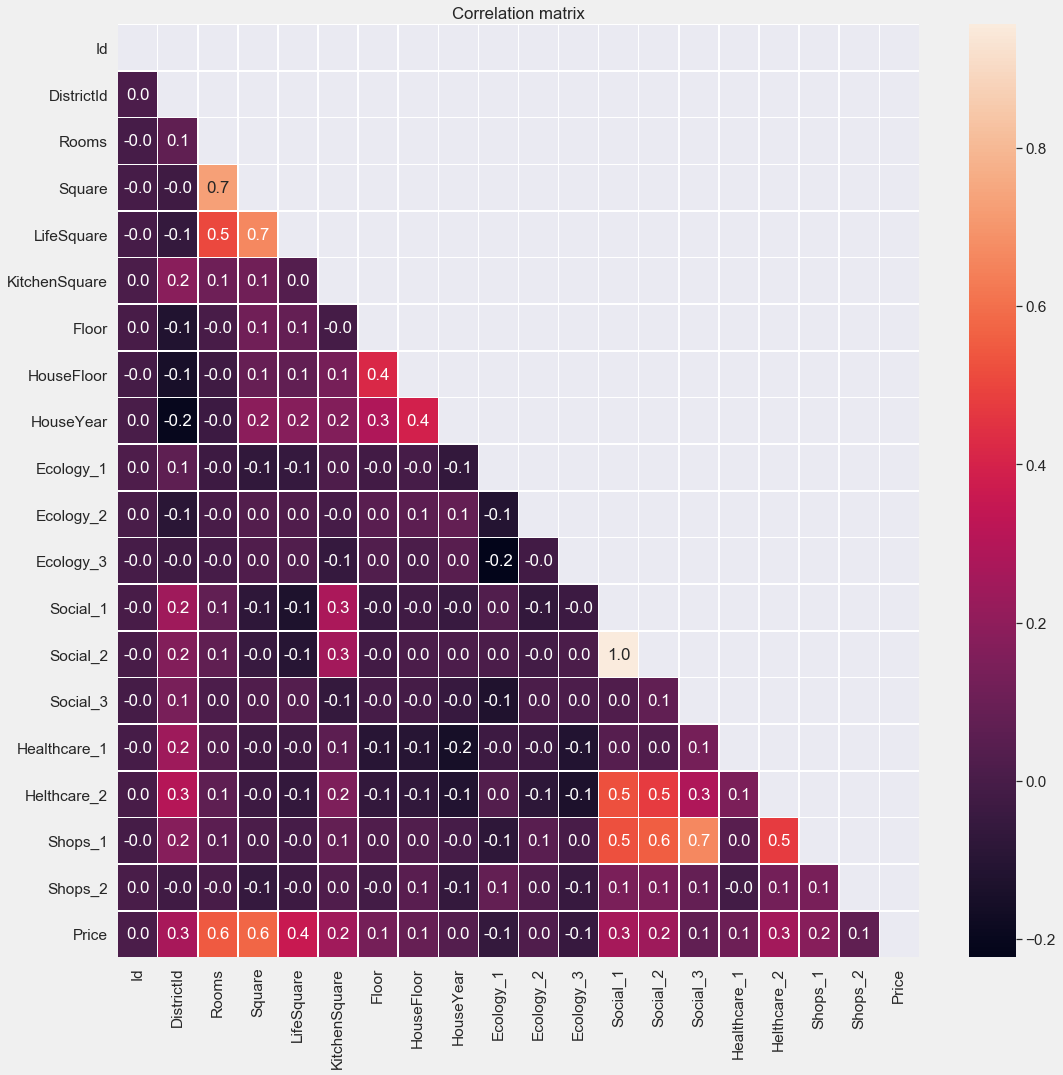

In [122]:
df_num_features = df[['Id','DistrictId','Rooms','Square','LifeSquare','KitchenSquare','Floor','HouseFloor','HouseYear','Ecology_1','Ecology_2','Ecology_3','Social_1','Social_2','Social_3','Healthcare_1','Helthcare_2','Shops_1','Shops_2','Price']]
num_features = pd.DataFrame(df_num_features)
corr = num_features.corr()
plt.figure(figsize = (16, 16))
mask = np.zeros_like(corr, dtype=np.bool)  # отрезаем лишнюю половину матрицы
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale=1.4)
sns.heatmap(num_features.corr(), mask=mask, annot=True, fmt='.1f', linewidths=.5)
plt.title('Correlation matrix')
plt.show();

# Создаем и тренируем модель

In [ ]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [123]:
X = df.drop(columns=["Price"])

In [124]:
y = df.drop(columns=['Id','HouseYear','Ecology_2','DistrictId','Rooms','Square','LifeSquare','KitchenSquare','Floor','HouseFloor','Ecology_1','Ecology_3','Social_1','Social_2','Social_3','Healthcare_1','Helthcare_2','Shops_1','Shops_2'])

In [147]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=32)

In [148]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, max_depth=1000, n_jobs=-1)

In [149]:
%%time
model.fit(x_train, y_train)

Wall time: 6.94 s


RandomForestRegressor(max_depth=1000, n_estimators=1000, n_jobs=-1)

In [150]:
%%time
y_test_preds = model.predict(x_test)

Wall time: 208 ms


In [151]:
%%time
y_test_X = model.predict(X)

Wall time: 309 ms


In [152]:
r2_score(y, y_test_X)

0.9397062516552246

R2:	0.94
RMSE:	22803.452
MSE:	519997429.843


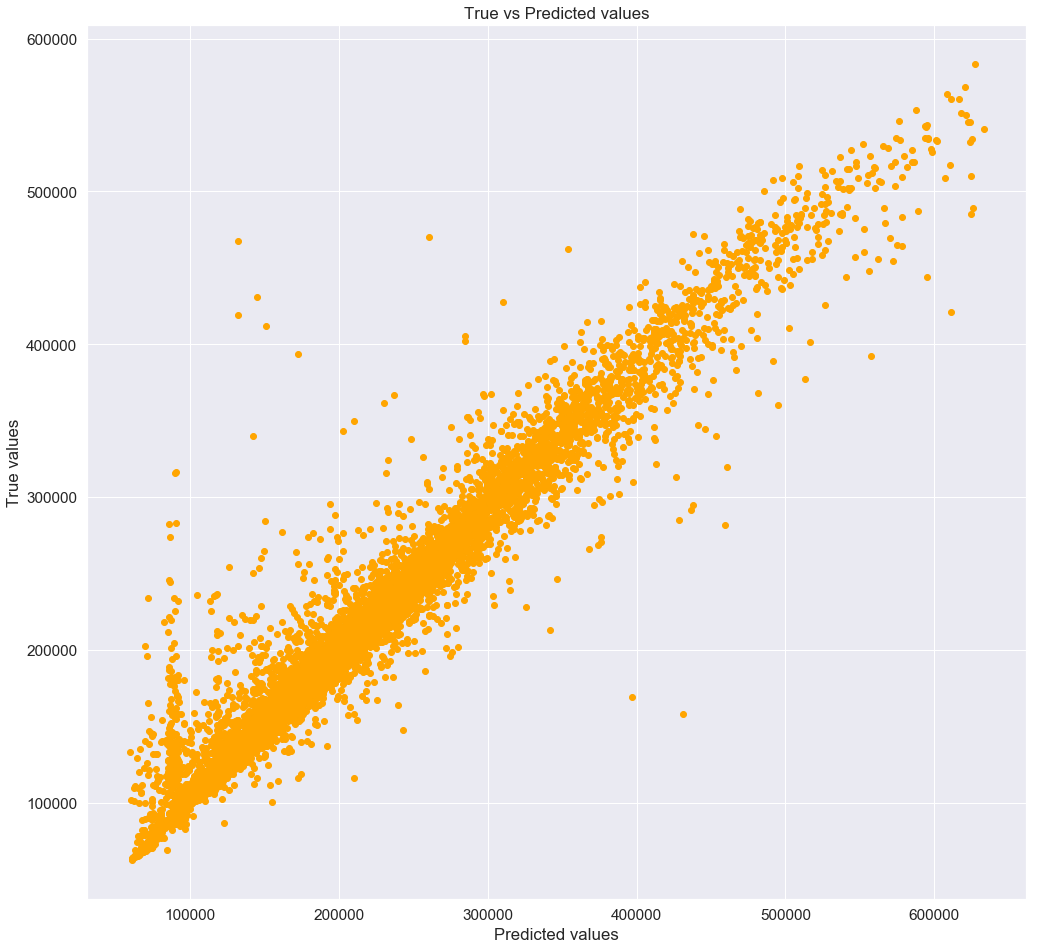

In [154]:
plt.figure(figsize=(15,15))
plt.scatter(y,y_test_X, color="Orange")
%config InlineBackend.figure_format = 'png'
true_values = y
pred_values = y_test_X
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('True vs Predicted values')
print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" + "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +"MSE:\t" + str(round(mse(true_values, pred_values), 3)))

# Выше предоставлена лучшая модель, чтобы всё корректно работало, нужно проигнорировать весь код, начиная отсюда:

In [153]:
r2_score(y_test, y_test_preds)

0.7402357972044733

R2:	0.729
RMSE:	49017.014
MSE:	2402667674.57


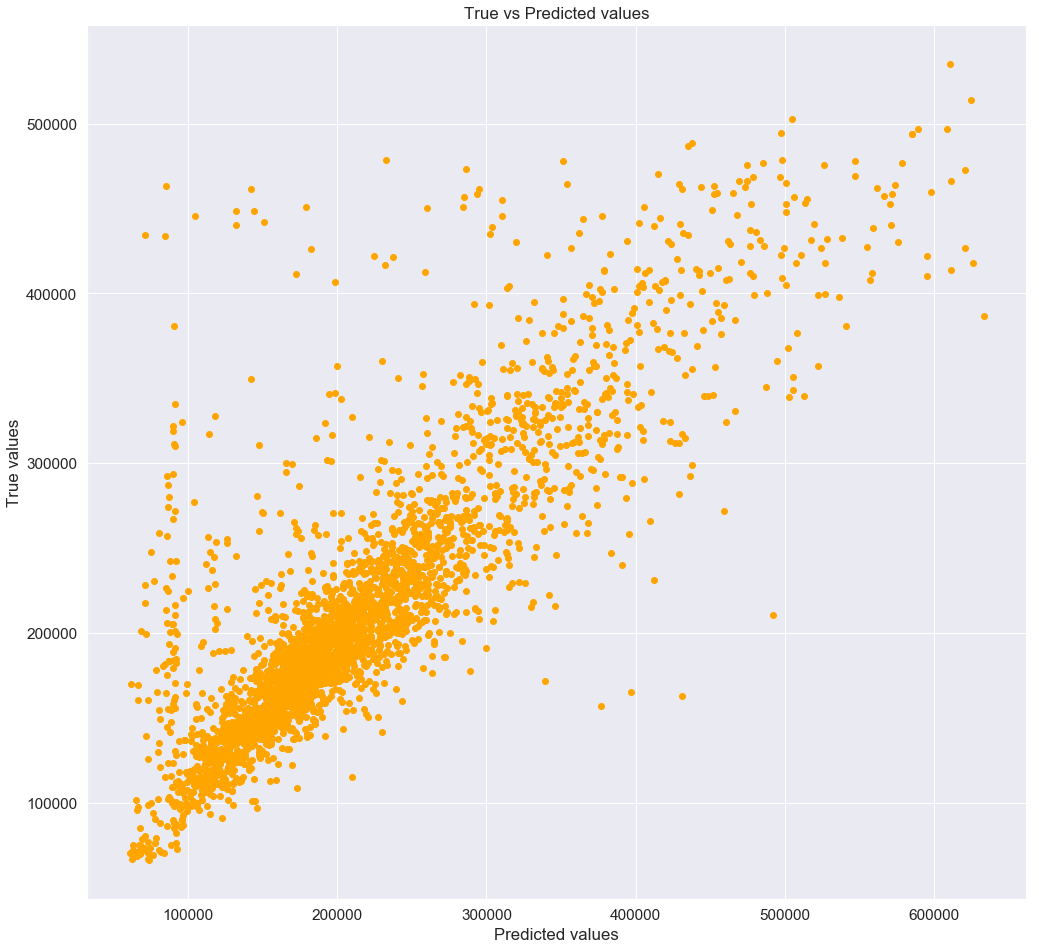

In [131]:
plt.figure(figsize=(15,15))
plt.scatter(y_test,y_test_preds, color="Orange")
%config InlineBackend.figure_format = 'png'
true_values = y_test
pred_values = y_test_preds
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('True vs Predicted values')
print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" + "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +"MSE:\t" + str(round(mse(true_values, pred_values), 3)))

# Применяем градиентный бустинг

In [132]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [133]:
%%time
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=30,
                                     min_samples_leaf=20,
                                     random_state=42,  
                                     n_estimators=1000)
gb_model.fit(x_train, y_train)

y_train_preds = gb_model.predict(x_test)

Wall time: 1min 9s


In [134]:
r2_score(y_test, y_train_preds)

0.701508140768295

R2:	0.702
RMSE:	51456.149
MSE:	2647735299.988


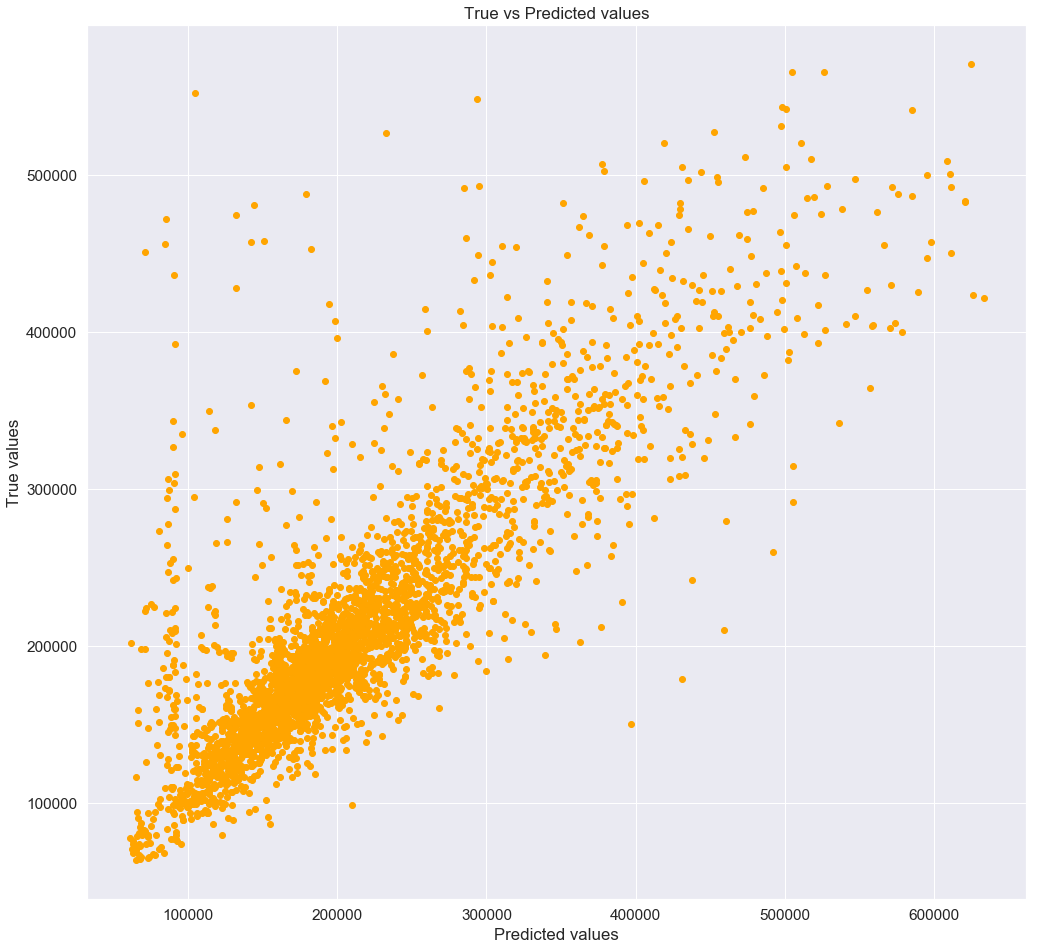

In [135]:
plt.figure(figsize=(15,15))
plt.scatter(y_test,y_train_preds, color="Orange")
%config InlineBackend.figure_format = 'png'
true_values = y_test
pred_values = y_train_preds
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title('True vs Predicted values')
print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" + "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +"MSE:\t" + str(round(mse(true_values, pred_values), 3)))

# И заканчивая здесь ^

# Смотрим на важность фич

In [136]:
gb_model.feature_importances_

array([0.02717062, 0.04704542, 0.07778532, 0.37594555, 0.03197442,
       0.02624629, 0.02332886, 0.02111584, 0.03555643, 0.04074507,
       0.        , 0.00001311, 0.07821177, 0.11626177, 0.06094303,
       0.01779987, 0.00524366, 0.01426502, 0.00034793])

In [137]:
feature_importancesGB = pd.DataFrame(gb_model.feature_importances_, x_train.columns)

In [138]:
feature_importancesD = pd.DataFrame(model.feature_importances_, x_train.columns)

In [139]:
feature_importancesGB.tail(5)

,0
Social_3,0.060943
Healthcare_1,0.017800
Helthcare_2,0.005244
Shops_1,0.014265
Shops_2,0.000348


In [140]:
feature_importancesD.tail(5)

,0
Social_3,0.056159
Healthcare_1,0.021303
Helthcare_2,0.006584
Shops_1,0.016638
Shops_2,0.000833


# Оформляем файл к отправке на проверку

In [165]:
dfMain = pd.read_csv(TEST)

In [166]:
dfMain[:3]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B


In [167]:
dfMain['Ecology_2'] = dfMain["Ecology_2"].replace("A", 0)
dfMain['Ecology_2'] = dfMain["Ecology_2"].replace("B", 1)
dfMain['Ecology_3'] = dfMain["Ecology_3"].replace("A", 0)
dfMain['Ecology_3'] = dfMain["Ecology_3"].replace("B", 1)
dfMain['Shops_2'] = dfMain["Shops_2"].replace("A", 0)
dfMain['Shops_2'] = dfMain["Shops_2"].replace("B", 1)
medians = dfMain[['LifeSquare', 'Healthcare_1']].median()
dfMain[['LifeSquare', 'Healthcare_1']] = dfMain[['LifeSquare', 'Healthcare_1']].fillna(medians)

In [168]:
mediansSquare = dfMain[['LifeSquare', 'Square', 'KitchenSquare']].median()

In [169]:
dfMain.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,35.485549,5.976800,8.632000,12.601000,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,1029.396400,1.31940,4.242800,0.917600
std,4832.674037,44.179466,0.838594,19.092787,15.915345,9.950018,5.483228,6.789213,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,766.595258,1.47994,4.777365,0.275001
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,25.850152,1.000000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,810.000000,0.00000,1.000000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,1.000000
75%,12598.250000,77.000000,2.000000,66.285129,41.769526,9.000000,12.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,990.000000,2.00000,6.000000,1.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000


In [170]:
X2 = dfMain

In [171]:
%%time
y_train__preds = model.predict(X2)

Wall time: 208 ms


In [172]:
dfMain['Price'] = y_train__preds

In [174]:
dfMain[['Id', 'Price']].to_csv('model_5.csv', index=None)